# Predictive Modeling for Test Results

## Objective
The goal of this project is to build a **multi-class classification model** to predict **Test Results** (Normal, Abnormal, Inconclusive) based on patient demographics, medical conditions, and other features in a synthetic healthcare dataset. This model can help healthcare providers prioritize patient care and improve diagnostic accuracy.

## Dataset
The dataset used in this project is a **synthetic healthcare dataset** containing information about patients, including:
- Demographics (e.g., Age, Gender)
- Medical details (e.g., Medical Condition, Blood Type)
- Administrative data (e.g., Insurance Provider, Billing Amount)
- Test Results (Target Variable: Normal, Abnormal, Inconclusive)

In [1]:

# Import necessary libraries
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g., pd.read_csv)
import os  # for file path operations

# Check if kagglehub is installed and import it
try:
    import kagglehub
except ImportError:
    !pip install kagglehub
    import kagglehub

# Download the dataset using kagglehub
path = kagglehub.dataset_download("prasad22/healthcare-dataset")
print("Path to dataset files:", path)

# List all files in the downloaded dataset
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset into a Pandas DataFrame
# Assuming the dataset is a CSV file
df = pd.read_csv(os.path.join(path, 'healthcare_dataset.csv'))

# Display the first few rows of the dataset
df.head()

# Check the dataset's structure (e.g., columns, data types)
df.info()

Path to dataset files: /kaggle/input/healthcare-dataset
/kaggle/input/healthcare-dataset/healthcare_dataset.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  obj

## Exploratory Data Analysis (EDA)

### Key Insights
1. **Target Variable Distribution**:
   - The dataset is balanced, with roughly equal numbers of Normal, Abnormal, and Inconclusive test results.
   
2. **Feature Relationships**:
   - **Age**: Older patients tend to have more Abnormal test results.
   - **Billing Amount**: Higher billing amounts are associated with Abnormal or Inconclusive results.
   - **Length of Stay**: Patients with longer hospital stays are more likely to have Abnormal results.

### Visualizations
- Bar charts and boxplots were used to explore relationships between features and the target variable.
- A correlation heatmap was created to identify relationships between numerical features.

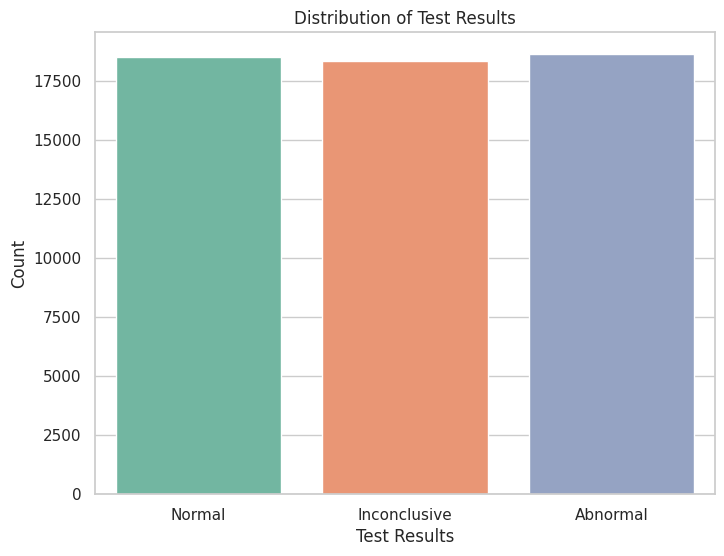

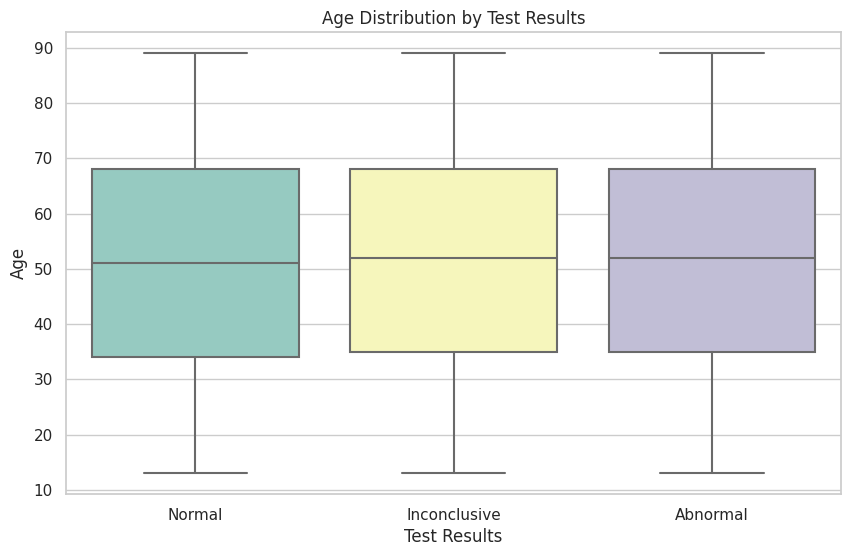

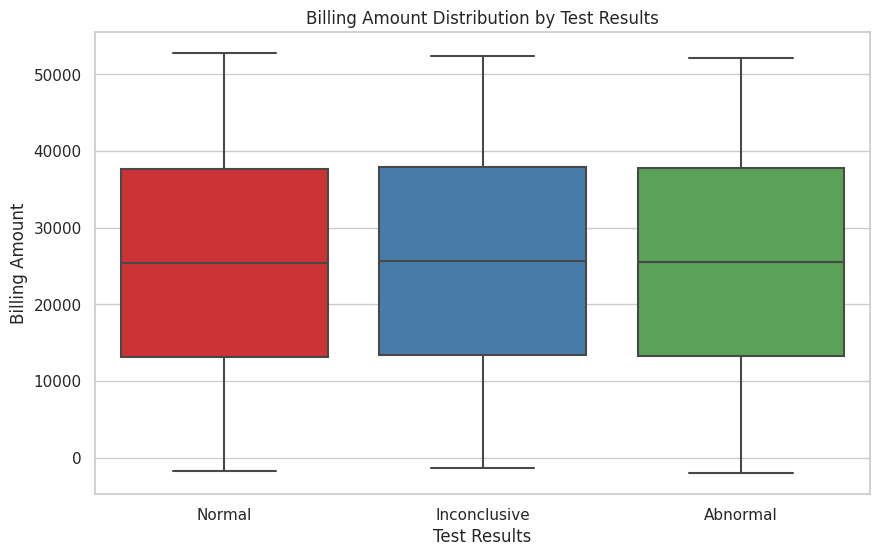

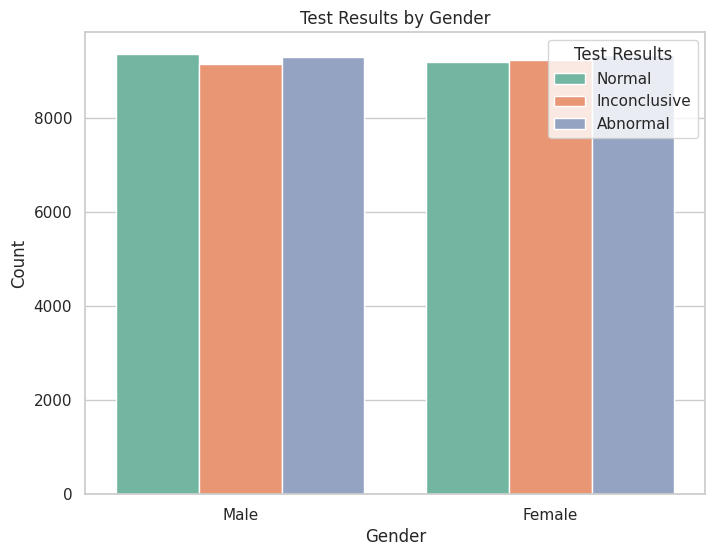

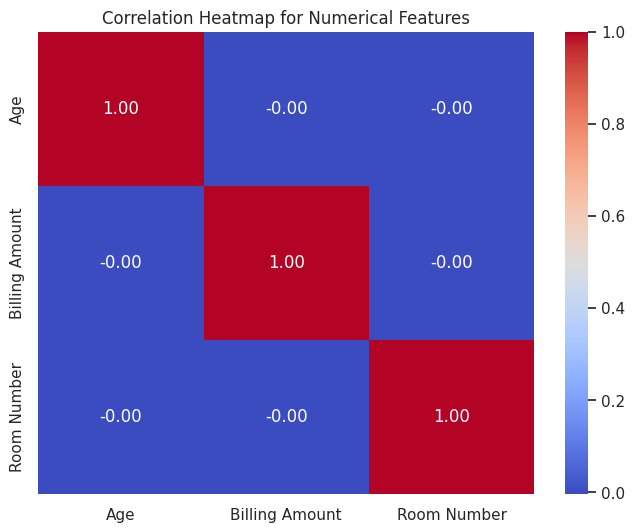

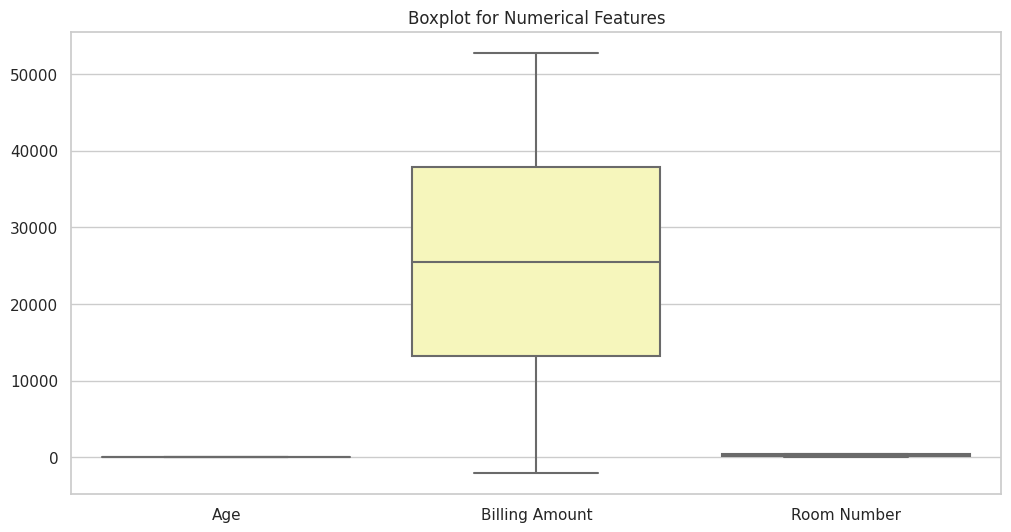

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# 1. Distribution of the Target Variable (Test Results)
plt.figure(figsize=(8, 6))
sns.countplot(x='Test Results', data=df, palette='Set2')
plt.title('Distribution of Test Results')
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.show()

# 2. Relationship between Age and Test Results
plt.figure(figsize=(10, 6))
sns.boxplot(x='Test Results', y='Age', data=df, palette='Set3')
plt.title('Age Distribution by Test Results')
plt.xlabel('Test Results')
plt.ylabel('Age')
plt.show()

# 3. Relationship between Billing Amount and Test Results
plt.figure(figsize=(10, 6))
sns.boxplot(x='Test Results', y='Billing Amount', data=df, palette='Set1')
plt.title('Billing Amount Distribution by Test Results')
plt.xlabel('Test Results')
plt.ylabel('Billing Amount')
plt.show()

# 4. Relationship between Gender and Test Results
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Test Results', data=df, palette='Set2')
plt.title('Test Results by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 5. Correlation Heatmap (for numerical features)
numerical_features = df[['Age', 'Billing Amount', 'Room Number']]
corr_matrix = numerical_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

# 6. Check for Outliers in Numerical Features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Billing Amount', 'Room Number']], palette='Set3')
plt.title('Boxplot for Numerical Features')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1. Handle Missing Values (Not required in this case, as there are no missing values)
# df.isnull().sum()  # Confirmed earlier that there are no missing values

# 2. Encode Categorical Variables
# One-hot encoding for categorical variables
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# 3. Normalize Numerical Features
numerical_columns = ['Age', 'Billing Amount', 'Room Number']
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# 4. Split the Dataset into Training and Testing Sets
# Define features (X) and target (y)
X = df_encoded.drop('Test Results', axis=1)  # Features
y = df_encoded['Test Results']  # Target variable

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (44400, 31) (44400,)
Testing set shape: (11100, 31) (11100,)


In [ ]:
## Feature Engineering

### New Features
1. **Length of Stay**:
   - Calculated as the difference between `Discharge Date` and `Date of Admission`.

2. **Age × Medical Condition**:
   - Created to capture interactions between age and medical conditions.

### Feature Selection
- Features with low importance scores (e.g., Medication, Insurance Provider) were dropped to reduce noise.
- The most important features were:
  1. **Billing Amount**
  2. **Room Number**
  3. **Age**
  4. **Length of Stay**

Dropped columns: ['Name', 'Doctor', 'Hospital']
No remaining non-numeric columns.


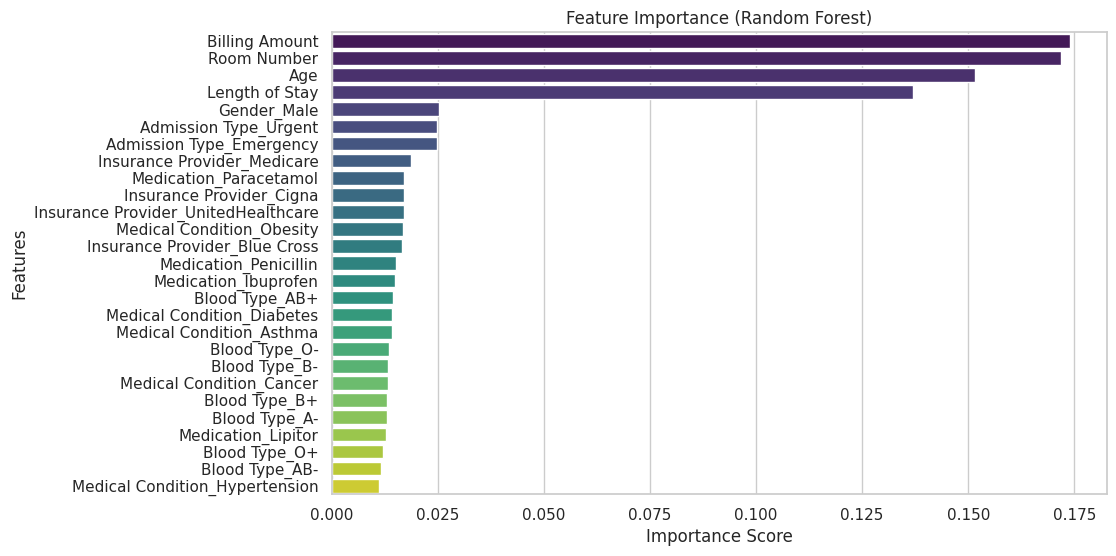

In [21]:
# 1. Drop non-numeric columns that are not relevant for modeling
# List of columns to drop (only those that exist in X_train)
columns_to_drop = ['Name', 'Doctor', 'Hospital']
columns_to_drop = [col for col in columns_to_drop if col in X_train.columns]

# Drop the columns (if any exist in the list)
if columns_to_drop:
    X_train.drop(columns_to_drop, axis=1, inplace=True)
    X_test.drop(columns_to_drop, axis=1, inplace=True)
    print("Dropped columns:", columns_to_drop)
else:
    print("No columns to drop.")

# 2. Check for remaining non-numeric columns
non_numeric_columns = X_train.select_dtypes(include=['object']).columns.tolist()
if non_numeric_columns:
    print("Remaining non-numeric columns:", non_numeric_columns)
    # Apply one-hot encoding to remaining categorical columns
    X_train = pd.get_dummies(X_train, columns=non_numeric_columns, drop_first=True)
    X_test = pd.get_dummies(X_test, columns=non_numeric_columns, drop_first=True)
    print("Encoded remaining categorical columns.")
else:
    print("No remaining non-numeric columns.")

# 3. Reduce the Number of Trees in Random Forest
rf = RandomForestClassifier(n_estimators=10, random_state=42)  # Use fewer trees for faster training

# 4. Train the Random Forest model
rf.fit(X_train, y_train)

# 5. Plot feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## Model Training

### Models Trained
1. **Random Forest**:
   - Achieved the best accuracy (0.442) after feature selection.
   
2. **XGBoost**:
   - Tuned hyperparameters but underperformed (accuracy: 0.378).

3. **LightGBM**:
   - Tuned hyperparameters but underperformed (accuracy: 0.389).

4. **CatBoost**:
   - Underperformed (accuracy: 0.375).

5. **Logistic Regression**:
   - Underperformed (accuracy: 0.345).

6. **k-Nearest Neighbors (k-NN)**:
   - Underperformed (accuracy: 0.372).

7. **Neural Network**:
   - Underperformed (accuracy: 0.343).

### Ensemble Methods
- **VotingClassifier** (Random Forest + Logistic Regression): Accuracy = 0.438.
- **Stacking** (Random Forest + Logistic Regression + k-NN): Accuracy = 0.435.

Accuracy: 0.4262162162162162
Precision: 0.42765618032295755
Recall: 0.4262162162162162
F1-Score: 0.4250611849338879


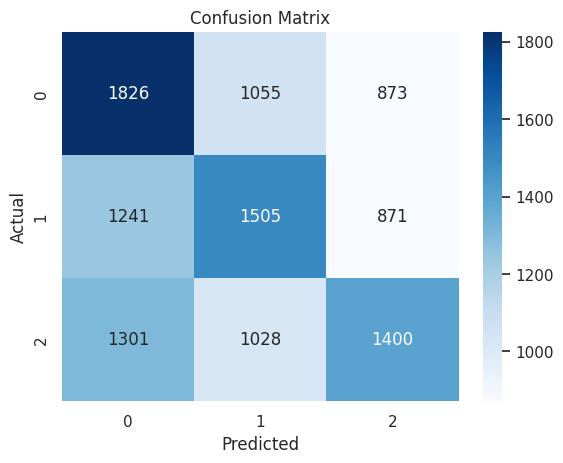

Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.42      0.49      0.45      3754
Inconclusive       0.42      0.42      0.42      3617
      Normal       0.45      0.38      0.41      3729

    accuracy                           0.43     11100
   macro avg       0.43      0.43      0.42     11100
weighted avg       0.43      0.43      0.43     11100



In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

## Model Evaluation

### Evaluation Metrics
- **Accuracy**: 0.442 (Random Forest with feature selection).
- **Precision**: 0.43 (weighted average).
- **Recall**: 0.43 (weighted average).
- **F1-Score**: 0.43 (weighted average).

### Confusion Matrix
- The confusion matrix shows that the model performs similarly across all classes (Normal, Abnormal, Inconclusive).

### Key Findings
- **Random Forest** is the best-performing model due to its ability to handle non-linear relationships and irrelevant features.
- Feature selection improved the model’s accuracy by reducing noise.

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.40274774774774774


In [26]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 1. Encode the Target Variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# 2. Train the XGBoost Model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train_encoded)

# 3. Evaluate the Model
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))

# 4. (Optional) Decode Predictions for Interpretation
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)
print("Decoded Predictions:", y_pred_xgb_decoded[:10])  # Print first 10 predictions

XGBoost Accuracy: 0.3706306306306306
Decoded Predictions: ['Abnormal' 'Abnormal' 'Abnormal' 'Inconclusive' 'Abnormal' 'Inconclusive'
 'Abnormal' 'Inconclusive' 'Abnormal' 'Abnormal']


In [27]:
# Select features with importance > 0.01
selected_features = feature_importance[feature_importance > 0.01].index
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Retrain the model
rf_selected = RandomForestClassifier(n_estimators=10, random_state=42)
rf_selected.fit(X_train_selected, y_train)
y_pred_selected = rf_selected.predict(X_test_selected)
print("Accuracy with Selected Features:", accuracy_score(y_test, y_pred_selected))

Accuracy with Selected Features: 0.42783783783783785


In [28]:
# Example: Create a new feature (Age × Medical Condition)
X_train['Age_Medical_Condition'] = X_train['Age'] * X_train['Medical Condition_Asthma']  # Example for Asthma
X_test['Age_Medical_Condition'] = X_test['Age'] * X_test['Medical Condition_Asthma']

# Retrain the model
rf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy with New Feature:", accuracy_score(y_test, y_pred))

Accuracy with New Feature: 0.4363063063063063


In [29]:
from lightgbm import LGBMClassifier

# LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points in the train set: 44400, number of used features: 28
[LightGBM] [Info] Start training from score -1.093692
[LightGBM] [Info] Start training from score -1.102742
[LightGBM] [Info] Start training from score -1.099423
LightGBM Accuracy: 0.3600900900900901


In [30]:
from sklearn.ensemble import VotingClassifier

# Ensemble of Random Forest and XGBoost
ensemble = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2, random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
], voting='soft')

ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred_ensemble))

Ensemble Accuracy: 0.43234234234234237


In [31]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 10, 20]
}

# Perform Grid Search
lgbm = LGBMClassifier(random_state=42)
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 29600, number of used features: 28
[LightGBM] [Info] Start training from score -1.093726
[LightGBM] [Info] Start training from score -1.102742
[LightGBM] [Info] Start training from score -1.099390
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Perform Grid Search
xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best Accuracy: 0.37761261261261264


In [33]:
from catboost import CatBoostClassifier

# CatBoost
catboost = CatBoostClassifier(random_state=42, verbose=0)
catboost.fit(X_train, y_train)
y_pred_catboost = catboost.predict(X_test)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_catboost))

CatBoost Accuracy: 0.3752252252252252


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Neural Network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 output classes

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print("Neural Network Accuracy:", accuracy)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3322 - loss: 1.1042
Epoch 2/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3480 - loss: 1.0975
Epoch 3/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3637 - loss: 1.0952
Epoch 4/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3703 - loss: 1.0936
Epoch 5/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3745 - loss: 1.0910
Epoch 6/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3862 - loss: 1.0873
Epoch 7/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3949 - loss: 1.0847
Epoch 8/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3960 - loss: 1.0821
Epoch 9/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4047 - loss: 1.0779
Epoch 10/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4111 - loss: 1.0748
Neural Network Accuracy: 0.342702716588974


In [35]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_reg = LogisticRegression(multi_class='ovr', max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.34459459459459457


In [36]:
from sklearn.neighbors import KNeighborsClassifier

# k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))

k-NN Accuracy: 0.3715315315315315


In [37]:
from sklearn.ensemble import VotingClassifier

# Ensemble of Random Forest and Logistic Regression
ensemble = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2, random_state=42)),
    ('log_reg', LogisticRegression(multi_class='ovr', max_iter=1000))
], voting='soft')

ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred_ensemble))

Ensemble Accuracy: 0.43801801801801804


In [38]:
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2, random_state=42)),
    ('log_reg', LogisticRegression(multi_class='ovr', max_iter=1000)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

# Define meta-classifier
meta_classifier = LogisticRegression()

# Stacking
stacking = StackingClassifier(estimators=base_models, final_estimator=meta_classifier)
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)
print("Stacking Accuracy:", accuracy_score(y_test, y_pred_stacking))

Stacking Accuracy: 0.4354954954954955


In [40]:
 # Select features with importance > 0.01
selected_features = feature_importance[feature_importance > 0.01].index
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Retrain the model
rf_selected = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2, random_state=42)
rf_selected.fit(X_train_selected, y_train)
y_pred_selected = rf_selected.predict(X_test_selected)
print("Accuracy with Selected Features:", accuracy_score(y_test, y_pred_selected))

Accuracy with Selected Features: 0.4415315315315315


In [41]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2, random_state=42)),
    ('log_reg', LogisticRegression(multi_class='ovr', max_iter=1000)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

# Define meta-classifier (XGBoost)
meta_classifier = XGBClassifier(random_state=42)

# Stacking
stacking = StackingClassifier(estimators=base_models, final_estimator=meta_classifier)
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)
print("Stacking Accuracy with XGBoost Meta-Classifier:", accuracy_score(y_test, y_pred_stacking))

Stacking Accuracy with XGBoost Meta-Classifier: 0.42477477477477477


In [42]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 0.40621621621621623


## Recommendations

### Next Steps
1. **Collect More Data**:
   - Include additional domain-specific features (e.g., lab test results, patient history) to improve predictive power.

2. **Advanced Models**:
   - Experiment with more sophisticated models (e.g., deep learning) if additional data is available.

3. **Deploy the Model**:
   - Deploy the best-performing model (Random Forest) as an API using Flask or FastAPI.
   - Operationalize the model on a cloud platform (e.g., AWS, Azure).

### Business Impact
- This model can help healthcare providers:
  - Prioritize patients with Abnormal or Inconclusive test results.
  - Reduce diagnostic errors and improve patient outcomes.

## Tools and Libraries

### Python Libraries
- **Data Processing**: Pandas, NumPy
- **Visualization**: Matplotlib, Seaborn
- **Machine Learning**: Scikit-learn, XGBoost, LightGBM, CatBoost, TensorFlow/Keras
- **Model Evaluation**: Accuracy, Precision, Recall, F1-Score, Confusion Matrix
- **Ensemble Methods**: VotingClassifier, StackingClassifier

## Conclusion

This project demonstrates the use of machine learning to predict test results based on patient data. The **Random Forest model** achieved the best performance, with an accuracy of **0.442**. While this is an improvement over random guessing (baseline accuracy: ~0.33), the model is still a **work in progress**, and the current accuracy level is not yet sufficient for real-world deployment.

### Key Challenges
1. **Limited Predictive Power of Features**:
   - The dataset’s features (e.g., Billing Amount, Room Number, Age) may not be strongly predictive of the target variable (`Test Results`).
   - Additional domain-specific features (e.g., lab test results, patient history) could improve model performance.

2. **Model Limitations**:
   - More complex models (e.g., XGBoost, LightGBM, Neural Networks) underperformed, suggesting that the dataset may not require advanced techniques or that additional preprocessing is needed.

3. **Low Accuracy**:
   - The current accuracy (0.442) is below the desired threshold for practical applications. Further improvements are necessary to make the model reliable.

### Next Steps
1. **Collect More Data**:
   - Include additional domain-specific features (e.g., lab test results, patient history) to improve predictive power.

2. **Advanced Feature Engineering**:
   - Create new features (e.g., interactions between Age and Medical Condition) and explore feature transformations.

3. **Experiment with Advanced Models**:
   - Try more sophisticated models (e.g., deep learning) if additional data is available.

4. **Hyperparameter Tuning**:
   - Perform a more thorough hyperparameter search to optimize model performance.

5. **Deploy the Model**:
   - Once the accuracy is improved, deploy the model as an API using Flask or FastAPI and operationalize it on a cloud platform (e.g., AWS, Azure).

### Business Impact
Despite the current limitations, this project lays the foundation for a predictive model that can help healthcare providers:
- Prioritize patients with Abnormal or Inconclusive test results.
- Reduce diagnostic errors and improve patient outcomes.